In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
def load_range_table(filename):
    table = dict() # table[Hand]->freq
    with open(filename, 'r') as f:
        s = f.read()
        s = s.split(',')
        for ss in s:
            ss = ss.split(':')
            ss[1] = float(ss[1])
            table[ss[0]] = ss[1]
    return table

def num_to_idx(num:str)->int:
    s = '23456789TJQKA'
    return s.find(num)

def plot_range(filename):
    rtable = load_range_table(filename)
    data = np.zeros((13, 13), dtype=float)
    for k, v in rtable.items():
        r = num_to_idx(k[0])
        c = num_to_idx(k[1])
        
        if k[0]==k[1]:
            data[r, c] = v
        elif k[2] == 's':
            data[r, c] = v
        else:
            data[c, r] = v
            
    s = '23456789TJQKA'
    # plt.rcParams['figure.figsize'] = (12, 8)

    fig, ax = plt.subplots(layout='constrained', figsize=(12, 8))
    sns.heatmap(data, annot=True, cmap='Blues', ax=ax)
    ax.invert_xaxis()
    ax.invert_yaxis()
    ax.set_xticklabels(s)
    ax.set_yticklabels(s)

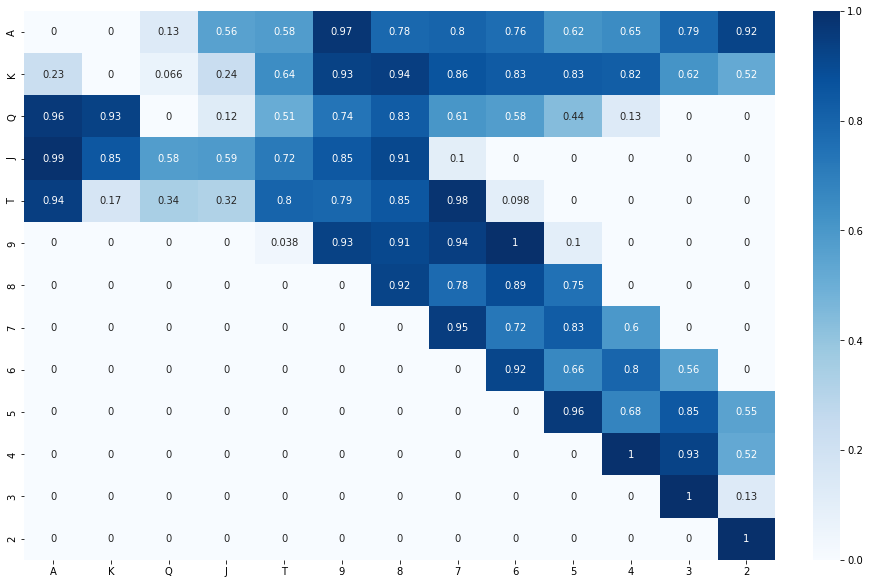

In [8]:
plot_range('range/BTN/call1.txt')